In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/total.CSV",encoding='euc-kr')
df

,No_Die,Lot_Num,Wafer_Num,Datetime,Ox_Chamber,type,Temp_OXid,ppm,Pressure,Oxid_time,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
0,NOLSM325131325,13,28,01-03-2019,2,dry,1214.307948,26.69,0.203,120,...,1.500000e+16,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141
1,NOLSM326132326,13,29,01-03-2019,2,dry,978.110792,30.86,0.217,137,...,1.110000e+16,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55
2,NOLSM327133327,13,30,01-03-2019,2,dry,1176.019149,31.07,0.218,116,...,1.040000e+16,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96
3,NOLSM328134328,13,31,01-03-2019,2,dry,933.442733,31.04,0.196,143,...,8.890000e+15,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105
4,NOLSM329135329,13,32,01-03-2019,2,wet,1140.598752,31.37,0.215,76,...,1.670000e+16,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2019,3,wet,1275.182502,45.10,0.214,21,...,1.050000e+16,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78
1700,NOLSM8493212,32,12,28-02-2019,1,wet,1268.105427,45.07,0.215,22,...,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42
1701,NOLSM8503213,32,13,28-02-2019,1,wet,1279.160563,45.12,0.214,21,...,9.320000e+15,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,42
1702,NOLSM8513214,32,14,28-02-2019,1,wet,1272.804948,45.34,0.213,20,...,1.180000e+16,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,24


In [39]:
df_Ox = df[['type','Temp_OXid','ppm','Pressure','Oxid_time','thickness']]

In [40]:
df_Ox

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness
0,dry,1214.307948,26.69,0.203,120,713.132
1,dry,978.110792,30.86,0.217,137,714.295
2,dry,1176.019149,31.07,0.218,116,710.114
3,dry,933.442733,31.04,0.196,143,710.617
4,wet,1140.598752,31.37,0.215,76,711.632
...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498
1700,wet,1268.105427,45.07,0.215,22,707.179
1701,wet,1279.160563,45.12,0.214,21,712.946
1702,wet,1272.804948,45.34,0.213,20,711.987


In [41]:
target= pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/target양불 빡셈.csv",encoding='euc-kr')
target

,Unnamed: 0,Target
0,0,bad
1,1,good
2,2,good
3,3,good
4,4,good
...,...,...
1699,1699,good
1700,1700,good
1701,1701,good
1702,1702,good


In [42]:
target=pd.DataFrame(target['Target'])
target

,Target
0,bad
1,good
2,good
3,good
4,good
...,...
1699,good
1700,good
1701,good
1702,good


In [43]:
df_Ox= pd.concat([df_Ox, target], axis = 1)

In [44]:
df_Ox

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Target
0,dry,1214.307948,26.69,0.203,120,713.132,bad
1,dry,978.110792,30.86,0.217,137,714.295,good
2,dry,1176.019149,31.07,0.218,116,710.114,good
3,dry,933.442733,31.04,0.196,143,710.617,good
4,wet,1140.598752,31.37,0.215,76,711.632,good
...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,good
1700,wet,1268.105427,45.07,0.215,22,707.179,good
1701,wet,1279.160563,45.12,0.214,21,712.946,good
1702,wet,1272.804948,45.34,0.213,20,711.987,good


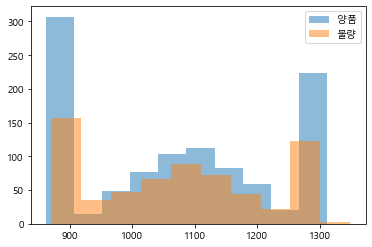

In [45]:
plt.hist(df_Ox[df_Ox['Target'] == 'good']['Temp_OXid'], label = '양품', alpha = 0.5)
plt.hist(df_Ox[df_Ox['Target'] == 'bad']['Temp_OXid'], label = '불량', alpha = 0.5)
plt.legend()

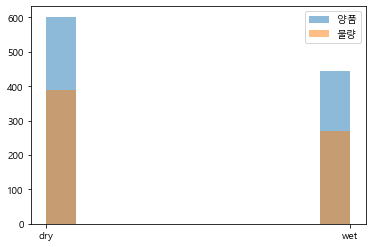

In [46]:
plt.hist(df_Ox[df_Ox['Target'] == 'good']['type'], label = '양품', alpha = 0.5)
plt.hist(df_Ox[df_Ox['Target'] == 'bad']['type'], label = '불량', alpha = 0.5)
plt.legend()

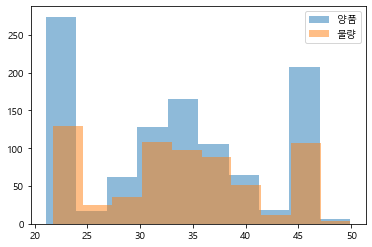

In [47]:
plt.hist(df_Ox[df_Ox['Target'] == 'good']['ppm'], label = '양품', alpha = 0.5)
plt.hist(df_Ox[df_Ox['Target'] == 'bad']['ppm'], label = '불량', alpha = 0.5)
plt.legend()

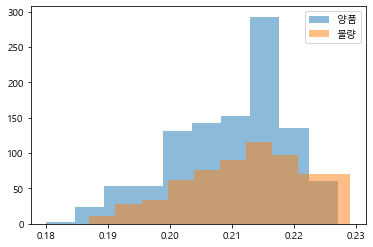

In [48]:
plt.hist(df_Ox[df_Ox['Target'] == 'good']['Pressure'], label = '양품', alpha = 0.5)
plt.hist(df_Ox[df_Ox['Target'] == 'bad']['Pressure'], label = '불량', alpha = 0.5)
plt.legend()

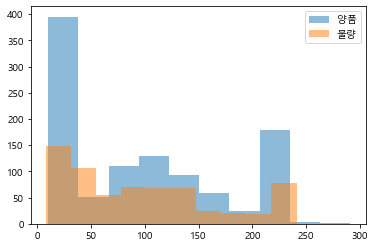

In [49]:
plt.hist(df_Ox[df_Ox['Target'] == 'good']['Oxid_time'], label = '양품', alpha = 0.5)
plt.hist(df_Ox[df_Ox['Target'] == 'bad']['Oxid_time'], label = '불량', alpha = 0.5)
plt.legend()

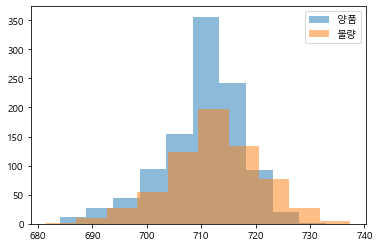

In [50]:
plt.hist(df_Ox[df_Ox['Target'] == 'good']['thickness'], label = '양품', alpha = 0.5)
plt.hist(df_Ox[df_Ox['Target'] == 'bad']['thickness'], label = '불량', alpha = 0.5)
plt.legend()